In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
import numpy as np 
import pandas as pd 

In [8]:
data=pd.read_csv("winequality-red.csv")

In [10]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [18]:
data.shape

(1599, 12)

In [14]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [17]:
data.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [19]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Text(0.5, 1.0, 'Quality vs Fixed Acidity')

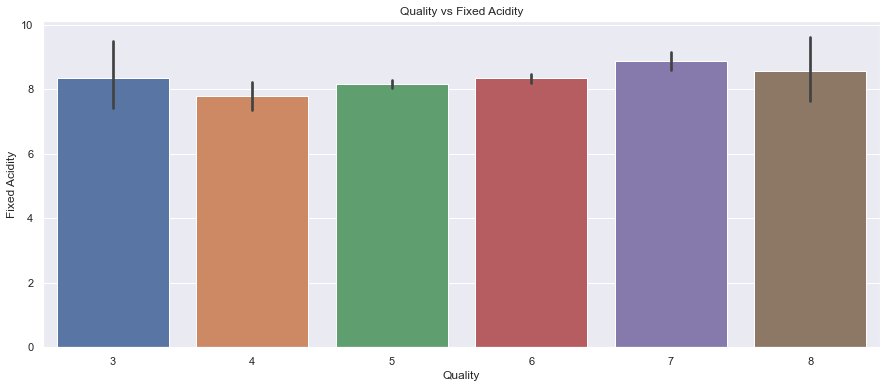

In [20]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = data)
plt.xlabel("Quality")
plt.ylabel("Fixed Acidity")
plt.title("Quality vs Fixed Acidity")

In [21]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>

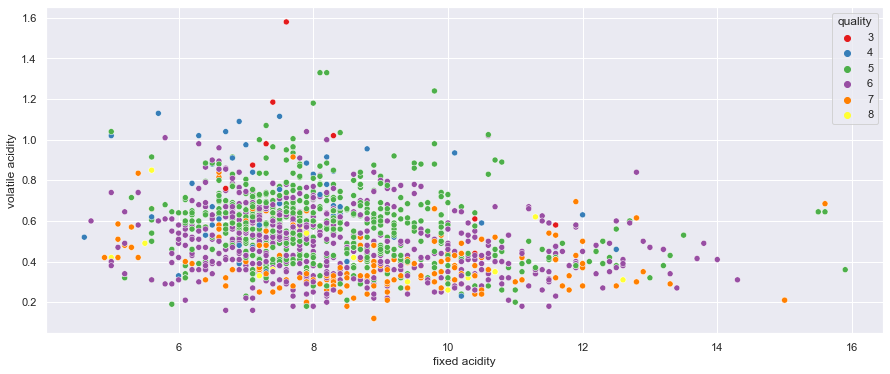

In [29]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='fixed acidity', y='volatile acidity', data = data, hue='quality', palette='Set1')

In [30]:
correlation = data.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

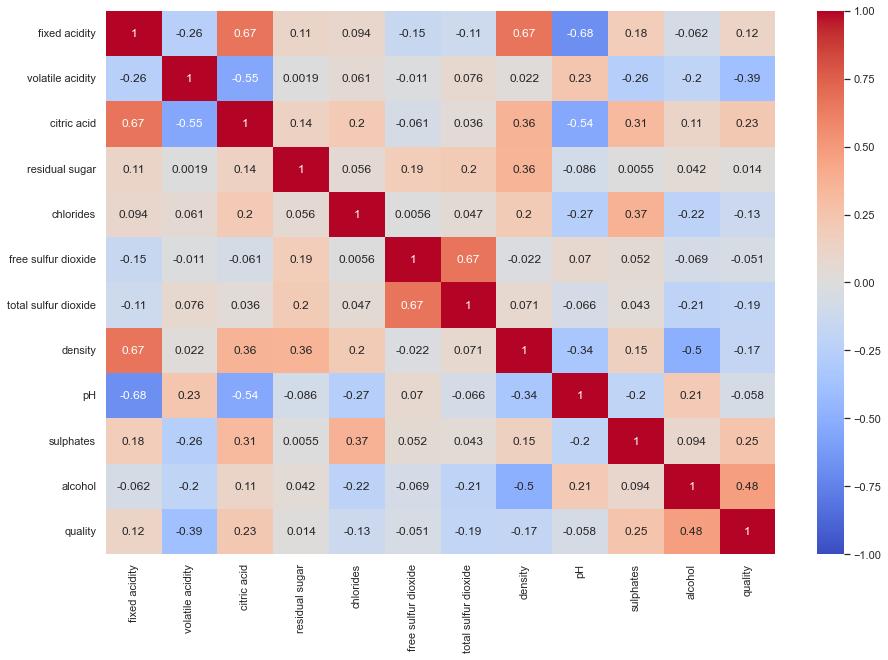

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

<Figure size 1080x720 with 0 Axes>

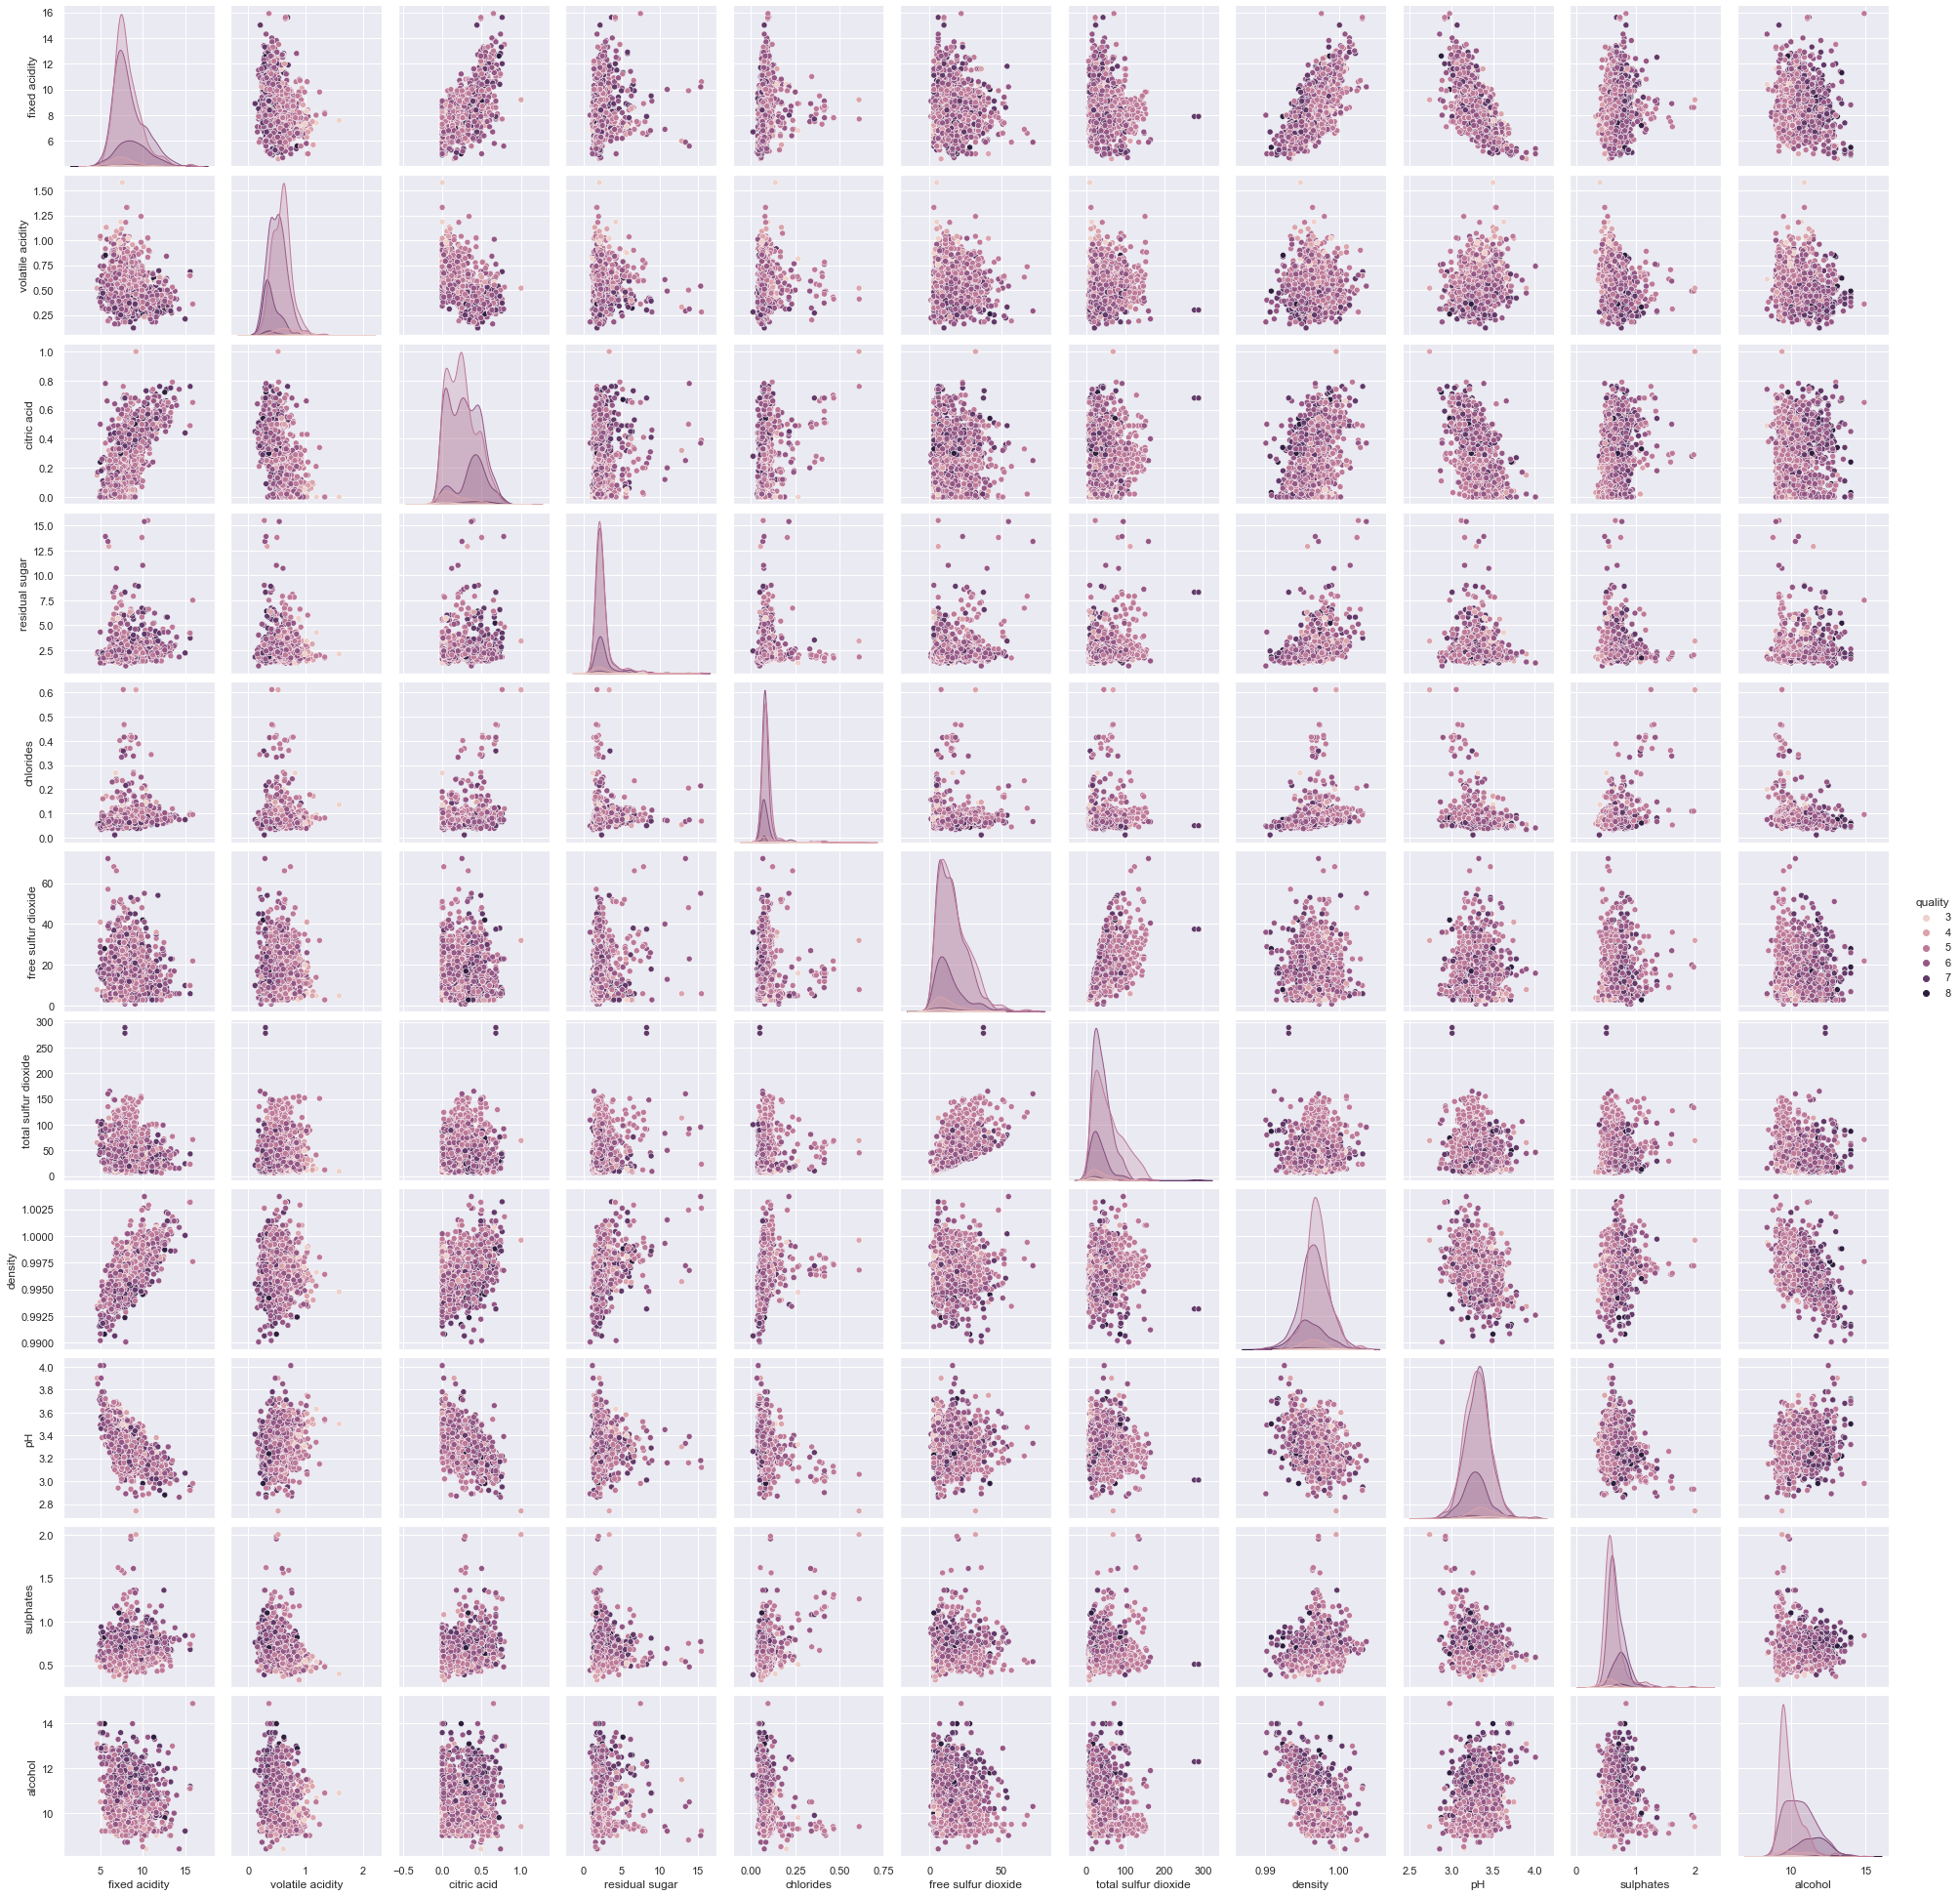

In [32]:
plt.figure(figsize=(15,10))
sns.pairplot(data, hue='quality')

In [33]:
data['range'] = pd.cut(data.quality, bins=[0,5,10], labels=['bad','good'])

In [34]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,range
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad


In [35]:
x = data.drop(['quality','range'],axis=1)
y= data[['range']]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [36]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='gini', max_depth=3)
model = classifier.fit(x_train, y_train)
classifier.score(x_train, y_train)

0.7404222048475372

In [42]:
model.predict(x_test)

array(['good', 'bad', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'bad', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'bad', 'good',
       'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'bad',
       'bad', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'bad', 'bad',
       'good', 'bad', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'bad', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'good',
       'bad', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'bad', 'good',
       'bad', 'bad', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'bad', 'bad', 'good', 'bad', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 

In [37]:
model.score(x_test,y_test)

0.71875

In [38]:
from sklearn.metrics import confusion_matrix

y_predict_test = classifier.predict(x_test)
confusion_matrix(y_test, y_predict_test)

array([[110,  44],
       [ 46, 120]], dtype=int64)

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

         bad       0.71      0.71      0.71       154
        good       0.73      0.72      0.73       166

    accuracy                           0.72       320
   macro avg       0.72      0.72      0.72       320
weighted avg       0.72      0.72      0.72       320



[Text(558.0, 475.65000000000003, 'alcohol <= 10.25\ngini = 0.497\nsamples = 1279\nvalue = [590, 689]\nclass = good'),
 Text(279.0, 339.75, 'sulphates <= 0.575\n0.452\n668\n[438, 230]\nbad'),
 Text(139.5, 203.85000000000002, 'sulphates <= 0.535\n0.31\n281\n[227, 54]\nbad'),
 Text(69.75, 67.94999999999999, '0.226\n169\n[147, 22]\nbad'),
 Text(209.25, 67.94999999999999, '0.408\n112\n[80, 32]\nbad'),
 Text(418.5, 203.85000000000002, 'total sulfur dioxide <= 50.5\n0.496\n387\n[211, 176]\nbad'),
 Text(348.75, 67.94999999999999, '0.493\n237\n[104, 133]\ngood'),
 Text(488.25, 67.94999999999999, '0.409\n150\n[107, 43]\nbad'),
 Text(837.0, 339.75, 'sulphates <= 0.585\n0.374\n611\n[152, 459]\ngood'),
 Text(697.5, 203.85000000000002, 'volatile acidity <= 0.365\n0.496\n171\n[78, 93]\ngood'),
 Text(627.75, 67.94999999999999, '0.114\n33\n[2, 31]\ngood'),
 Text(767.25, 67.94999999999999, '0.495\n138\n[76, 62]\nbad'),
 Text(976.5, 203.85000000000002, 'total sulfur dioxide <= 96.0\n0.28\n440\n[74, 366]\

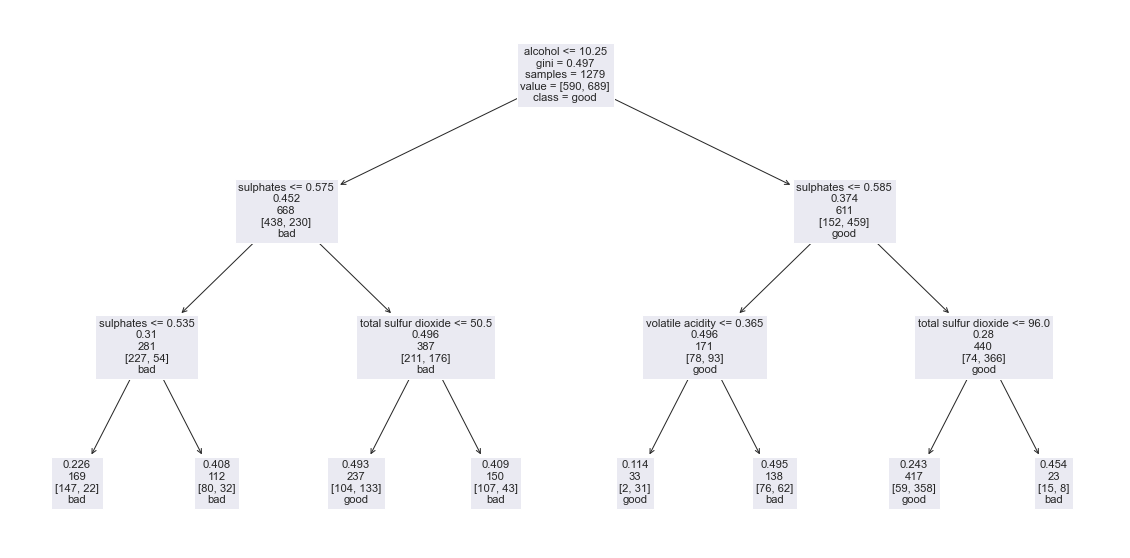

In [40]:
from sklearn import tree
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,10))

tree.plot_tree(model, feature_names = x.columns, class_names = model.classes_, label='root') 